# CASE STUDY: IRIS PLANT CLASSIFICATION USING K-NEAREST NEIGHBORS






# STEP #0: PROBLEM STATEMENT

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. The attribute to be predicted is the class of iris plant. The classes are as follows: 1. Iris Setosa, 2. Iris Versicolour, 3. Iris Virginica

There are 4 features: 
1. sepalLength: sepal length in cm
2. sepalWidth: sepal width in cm
3. petalLength: petal length in cm
4. petalWidth: petal width in cm

There are 3 classes represneting class label of iris flower {1,2,3} 
1. Iris Setosa
2. Iris Versicolour
3. Iris Virginica



# STEP #1: IMPORTING LIBRARIES

In [35]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns # Import seaborn for statistical data visualization


# STEP #2: IMPORT/EXPLORE THE DATASET  

In [36]:
# Import our dataset
iris_df = pd.read_csv('Iris.csv')
iris_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [37]:
# Let's view the head of the dataset
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [38]:
# Let's view the last elements in the dataset
iris_df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


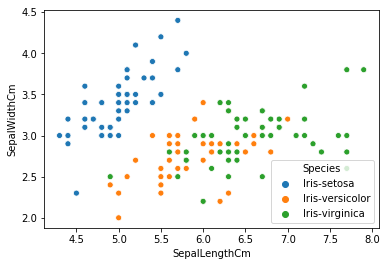

In [39]:
# scatterplot of SepalLengthCm versus SepalWidthCm
sns.scatterplot( x = 'SepalLengthCm', y = 'SepalWidthCm', hue = 'Species', data = iris_df)

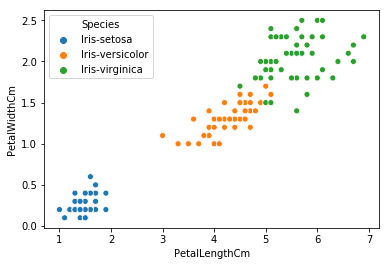

In [40]:
# scatterplot of PetalLengthCm versus PetalWidthCm
sns.scatterplot(x = 'PetalLengthCm', y = 'PetalWidthCm', hue = 'Species', data = iris_df)

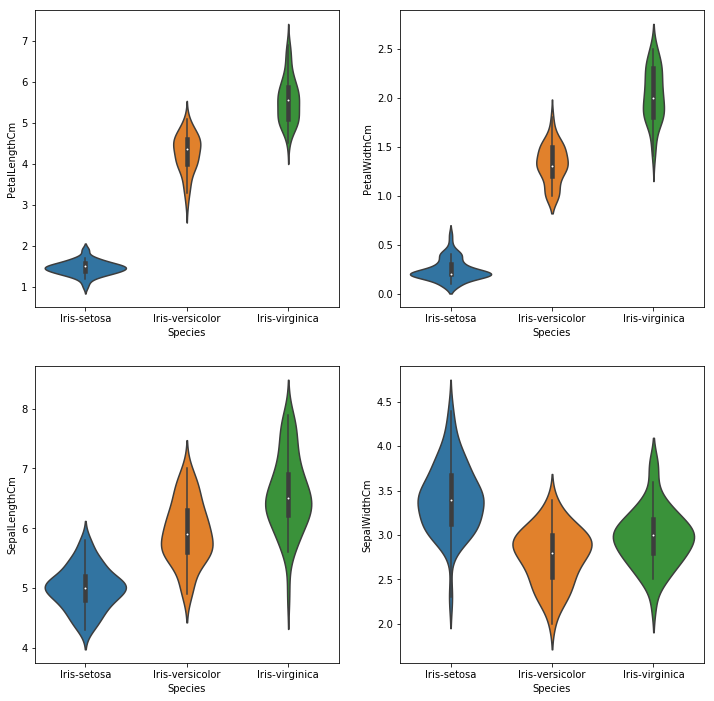

In [41]:
# Let's show the Violin plot 
plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris_df)

plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris_df)

plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris_df)

plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=iris_df)

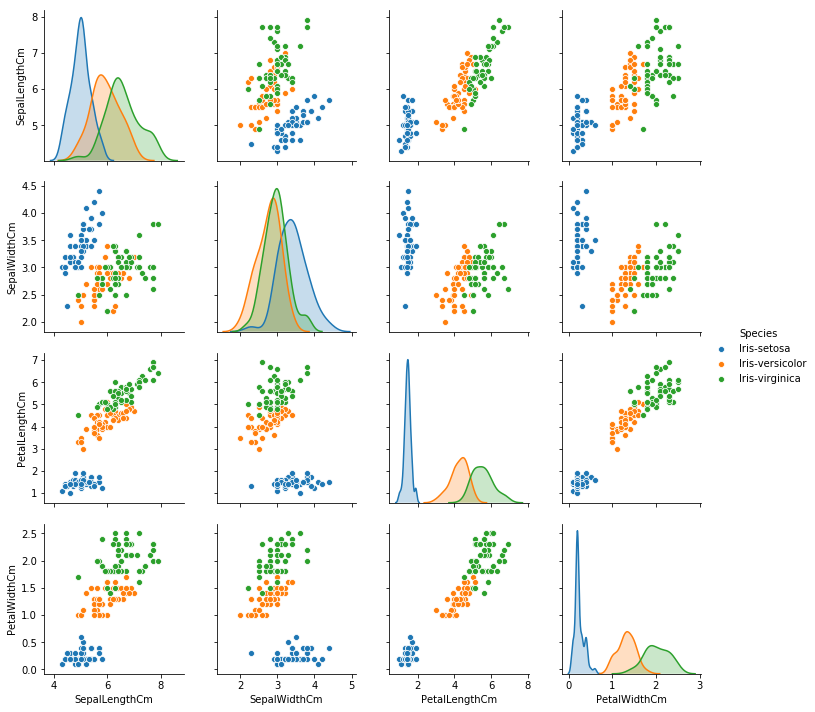

In [42]:
# Let's try the Seaborn pairplot 
sns.pairplot(iris_df, hue = 'Species')

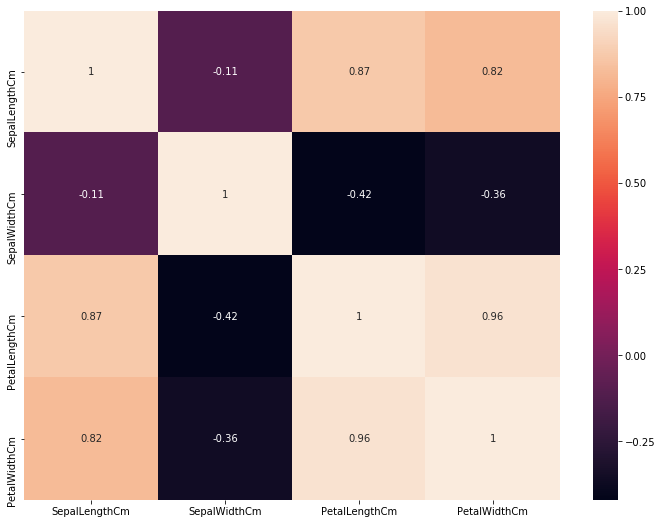

In [43]:
# Let's check the correlation between the variables 
plt.figure(figsize=(12,9)) 
sns.heatmap(iris_df.corr(),annot=True) 


# STEP #3: DATA CLEANING

In [44]:
# Let's drop the Species coloumn
X = iris_df.drop(['Species'],axis=1)
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [45]:
# Let's take our target class
y = iris_df['Species']
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
6         Iris-setosa
7         Iris-setosa
8         Iris-setosa
9         Iris-setosa
10        Iris-setosa
11        Iris-setosa
12        Iris-setosa
13        Iris-setosa
14        Iris-setosa
15        Iris-setosa
16        Iris-setosa
17        Iris-setosa
18        Iris-setosa
19        Iris-setosa
20        Iris-setosa
21        Iris-setosa
22        Iris-setosa
23        Iris-setosa
24        Iris-setosa
25        Iris-setosa
26        Iris-setosa
27        Iris-setosa
28        Iris-setosa
29        Iris-setosa
            ...      
120    Iris-virginica
121    Iris-virginica
122    Iris-virginica
123    Iris-virginica
124    Iris-virginica
125    Iris-virginica
126    Iris-virginica
127    Iris-virginica
128    Iris-virginica
129    Iris-virginica
130    Iris-virginica
131    Iris-virginica
132    Iris-virginica
133    Iris-virginica
134    Iri

In [46]:
# Import train_test_split from scikit library
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35,  random_state = 10)

In [47]:
X_train.shape

(97, 4)

In [48]:
y_train

78     Iris-versicolor
51     Iris-versicolor
14         Iris-setosa
48         Iris-setosa
63     Iris-versicolor
20         Iris-setosa
137     Iris-virginica
29         Iris-setosa
3          Iris-setosa
106     Iris-virginica
98     Iris-versicolor
140     Iris-virginica
37         Iris-setosa
139     Iris-virginica
45         Iris-setosa
82     Iris-versicolor
83     Iris-versicolor
42         Iris-setosa
143     Iris-virginica
131     Iris-virginica
116     Iris-virginica
105     Iris-virginica
133     Iris-virginica
6          Iris-setosa
79     Iris-versicolor
108     Iris-virginica
99     Iris-versicolor
34         Iris-setosa
128     Iris-virginica
50     Iris-versicolor
            ...       
86     Iris-versicolor
92     Iris-versicolor
148     Iris-virginica
25         Iris-setosa
138     Iris-virginica
13         Iris-setosa
69     Iris-versicolor
77     Iris-versicolor
135     Iris-virginica
136     Iris-virginica
33         Iris-setosa
62     Iris-versicolor
122     Iri

# STEP #4: TRAINING THE MODEL

In [49]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 6 , metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

# STEP #5: EVALUATING THE MODEL

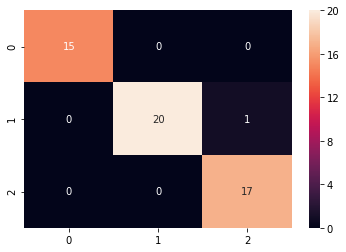

In [50]:
# Let's check our model using confusion matrix and classification report
from sklearn.metrics import classification_report, confusion_matrix
y_predict = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True, fmt="d")

In [51]:
print(classification_report(y_test, y_predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.95      0.98        21
 Iris-virginica       0.94      1.00      0.97        17

      micro avg       0.98      0.98      0.98        53
      macro avg       0.98      0.98      0.98        53
   weighted avg       0.98      0.98      0.98        53

